<a href="https://colab.research.google.com/github/Nish-hub94/ML-for-Computer-vision/blob/main/exe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cifar10-linear.py to cifar10-linear.py


In [ ]:
!ls

cifar10-linear.py  sample_data


In [ ]:
!python3 cifar10-linear.py

2025-12-23 09:04:44.439244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-23 09:04:44.444826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-23 09:04:44.461845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766480684.493792     944 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766480684.501796     944 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766480684.527828     944 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Q2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CIFAR10-small.zip to CIFAR10-small.zip


In [ ]:
!unzip CIFAR10-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: testing/image_0001.png  
  inflating: testing/image_0002.png  
  inflating: testing/image_0003.png  
  inflating: testing/image_0004.png  
  inflating: testing/image_0005.png  
  inflating: testing/image_0006.png  
  inflating: testing/image_0007.png  
  inflating: testing/image_0008.png  
  inflating: testing/image_0009.png  
  inflating: testing/image_0010.png  
  inflating: testing/image_0011.png  
  inflating: testing/image_0012.png  
  inflating: testing/image_0013.png  
  inflating: testing/image_0014.png  
  inflating: testing/image_0015.png  
  inflating: testing/image_0016.png  
  inflating: testing/image_0017.png  
  inflating: testing/image_0018.png  
  inflating: testing/image_0019.png  
  inflating: testing/image_0020.png  
  inflating: testing/image_0021.png  
  inflating: testing/image_0022.png  
  inflating: testing/image_0023.png  
  inflating: testing/image_0024.png  
  inflating: testing/image_0025.png  

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    x = Input(shape=(input_shape))
    y = Flatten()(x)
    #adding another dense layer.
    #y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax', name='dense_layer')(y)  #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1704 - loss: 2.2922 - val_accuracy: 0.2715 - val_loss: 2.0559
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2848 - loss: 2.0107 - val_accuracy: 0.3070 - val_loss: 1.9676
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3234 - loss: 1.9375 - val_accuracy: 0.3300 - val_loss: 1.9255
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3488 - loss: 1.8851 - val_accuracy: 0.3505 - val_loss: 1.8972
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3628 - loss: 1.8688 - val_accuracy: 0.3590 - val_loss: 1.8817
Test loss: 1.8483487367630005
Test accuracy: 0.35866665840148926


Q3
(i)

(ii)number of inputs=32,
number of outputs=32,
weight mnatrix size=3

(iii)

(iv)number of samples for training=10,000

number of samples for validation=2000

number of samples for test=3000

For epoch=100

Test Loss=1.7358100414276123

Test Accuracy=0.39899998903274536


Q3

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    x = Input(shape=(input_shape))
    y = Flatten()(x)
    #adding another dense layer.
    #y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax', name='dense_layer')(y)  #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)

weights, biases = model.get_layer('dense_layer').get_weights()
model.summary()
print('Dense layer n. of inputs:' + str(weights.shape[0]))
print('Dense layer n. of inputs:' + str(weights.shape[1]))
print('Dense layer n. of inputs:' + str(weights.shape[0]* weights.shape[1]))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

Dense layer n. of inputs:3072
Dense layer n. of inputs:10
Dense layer n. of inputs:30720
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1647 - loss: 2.3044 - val_accuracy: 0.2520 - val_loss: 2.0531
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2824 - loss: 2.0205 - val_accuracy: 0.3005 - val_loss: 1.9659
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3293 - loss: 1.9262 - val_accuracy: 0.3210 - val_loss: 1.9221
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3491 - loss: 1.8884 - val_accuracy: 0.3265 - val_loss: 1.8990
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3566 - loss: 1.8529 - val_accuracy: 0.3355 - val_loss: 1.8804
Test loss: 1.855926752090454
Test accuracy: 0.3479999899864197


Q4

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    x = Input(shape=(input_shape))
    y = Flatten()(x)
    #adding another dense layer.
    #y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax', name='dense_layer')(y)   #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)

weights, biases = model.get_layer('dense_layer').get_weights()
model.summary()
print('Dense layer n. of inputs:' + str(weights.shape[0]))
print('Dense layer n. of inputs:' + str(weights.shape[1]))
print('Dense layer n. of inputs:' + str(weights.shape[0]* weights.shape[1]))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

Dense layer n. of inputs:3072
Dense layer n. of inputs:10
Dense layer n. of inputs:30720
Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1533 - loss: 2.3174 - val_accuracy: 0.2710 - val_loss: 2.0549
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2867 - loss: 2.0170 - val_accuracy: 0.3035 - val_loss: 1.9693
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3269 - loss: 1.9403 - val_accuracy: 0.3205 - val_loss: 1.9277
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3459 - loss: 1.8899 - val_accuracy: 0.3410 - val_loss: 1.8992
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3629 - loss: 1.8725 - val_accuracy: 0.3425 - val_loss: 1.8827
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3656 - loss: 1.8460 - val_accuracy: 0.3565 - val_loss: 1.8658
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3767 - loss: 1.8233 - val_accuracy: 0.3565 - val_loss: 1.8600
Epoch 8/

Q5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vis-neurons.py to vis-neurons.py


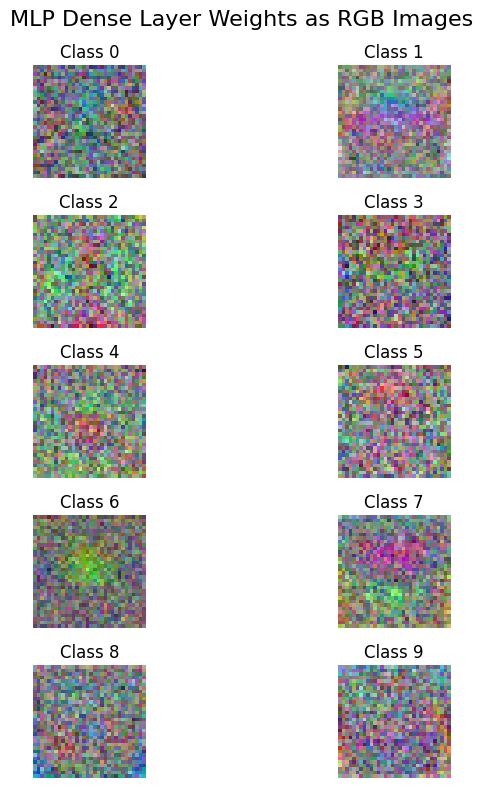

In [ ]:
# %load vis-neurons.py
from matplotlib import pyplot as plt
weights, biases = model.get_layer('dense_layer').get_weights()
height, width, channels = 32, 32, 3
input_shape = (height, width, channels)

fig, axes = plt.subplots(5, 2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
  if i >= weights.shape[1]:
    break

  weight_vector = weights[:, i]
  weight_image = weight_vector.reshape(input_shape)

  min_val = weight_image.min()
  max_val = weight_image.max()
  weight_image = (weight_image - min_val) / (max_val - min_val + 1e-5) # Avoid division by 0

  ax.imshow(weight_image)
  ax.set_title(f'Class {i}')
  ax.axis('off')

plt.suptitle('MLP Dense Layer Weights as RGB Images', fontsize=16)
plt.tight_layout()
plt.show()

**Q6 Modifying the dense layer by adding a parameter**

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image
def create_model(input_shape, dense_size, classes):
    x = Input(shape=(input_shape))
    y = Flatten()(x)
    #adding another dense layer.
    #y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax', name='dense_layer', kernel_regularizer=regularizers.L2(0.03))(y)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1672 - loss: 2.8495 - val_accuracy: 0.2700 - val_loss: 2.6071
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2960 - loss: 2.5718 - val_accuracy: 0.3060 - val_loss: 2.5013
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3294 - loss: 2.4685 - val_accuracy: 0.3285 - val_loss: 2.4397
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3538 - loss: 2.4015 - val_accuracy: 0.3500 - val_loss: 2.3929
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3653 - loss: 2.3564 - val_accuracy: 0.3490 - val_loss: 2.3533
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3703 - loss: 2.3260 - val_accuracy: 0.3615 - val_loss: 2.3213
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3722 - loss: 2.2829 - val_accuracy: 0.3710 - val_loss: 2.2919
Epoch 8/100
313/313 ━━━━━

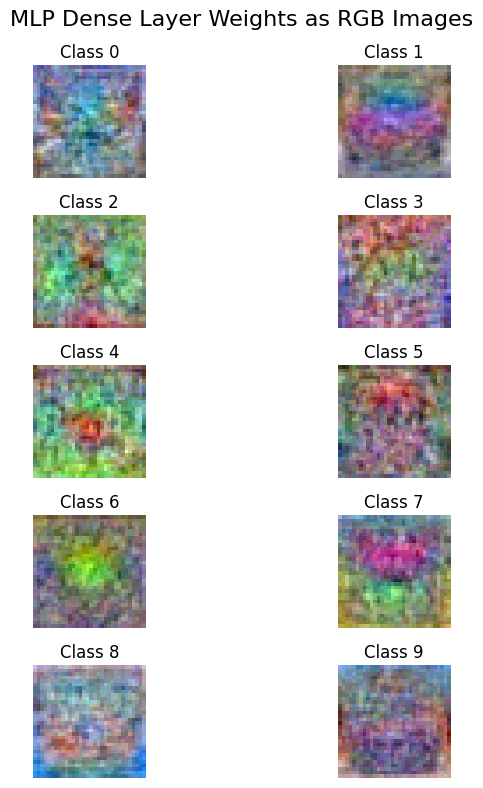

In [ ]:
# %load vis-neurons.py
from matplotlib import pyplot as plt
weights, biases = model.get_layer('dense_layer').get_weights()
height, width, channels = 32, 32, 3
input_shape = (height, width, channels)

fig, axes = plt.subplots(5, 2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
  if i >= weights.shape[1]:
    break

  weight_vector = weights[:, i]
  weight_image = weight_vector.reshape(input_shape)

  min_val = weight_image.min()
  max_val = weight_image.max()
  weight_image = (weight_image - min_val) / (max_val - min_val + 1e-5) # Avoid division by 0

  ax.imshow(weight_image)
  ax.set_title(f'Class {i}')
  ax.axis('off')

plt.suptitle('MLP Dense Layer Weights as RGB Images', fontsize=16)
plt.tight_layout()
plt.show()

Q6
(i)

 the original image:apperance is    completely noisy and random patterns.

*   color distribution is uniform and random
*   no training effect


 the second image: appearnce is faint structured patterns

*   Color distribution is not uniform
*   certain colors and shapes appearing more prominently in some classes.

(ii)



(iii)
*   Test loss: 1.8162614107131958
*   Test accuracy: 0.4099999964237213


**Q7 Adding the second dense layer to the neural network**

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    x = Input(shape=(input_shape))
    y = Flatten()(x)
    #adding another dense layer.
    y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax', name='dense_layer', kernel_regularizer=regularizers.L2(0.03))(y)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)

weights, biases = model.get_layer('dense_layer').get_weights()
model.summary()
print('Dense layer n. of inputs:' + str(weights.shape[0]))
print('Dense layer n. of inputs:' + str(weights.shape[1]))
print('Dense layer n. of inputs:' + str(weights.shape[0]* weights.shape[1]))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,310 (1.18 MB)

 Trainable params: 308,310 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Dense layer n. of inputs:100
Dense layer n. of inputs:10
Dense layer n. of inputs:1000
Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1911 - loss: 2.7749 - val_accuracy: 0.3110 - val_loss: 2.4773
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3518 - loss: 2.3816 - val_accuracy: 0.3545 - val_loss: 2.3577
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3969 - loss: 2.2656 - val_accuracy: 0.3805 - val_loss: 2.2851
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4194 - loss: 2.1784 - val_accuracy: 0.3910 - val_loss: 2.2276
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4365 - loss: 2.1254 - val_accuracy: 0.3970 - val_loss: 2.1886
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4575 - loss: 2.0631 - val_accuracy: 0.4090 - val_loss: 2.1585
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4622 - loss: 2.0185 - val_accuracy: 0.4155 - val_loss: 2.1285
Epoch 8/

Q7.

*  Test loss: 1.7255290746688843
*  Test accuracy: 0.4716666638851166


test accuracy is greater than when adding the 2nd layer.


original

*   Test loss: 1.8536183834075928

*   Test accuracy: 0.3453333377838135



In [ ]:
Q8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving activations.py to activations.py


In [ ]:
!python3 activations.py

2025-12-24 12:26:38.984439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766579199.028888   10235 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766579199.041299   10235 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766579199.077479   10235 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766579199.077544   10235 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766579199.077554   10235 computation_placer.cc:177] computation placer alr

In [ ]:
# %load activations.py
import numpy as np
from tensorflow import keras

input = np.array([[-1, 0, 1, 2], [-2, 0, 1, 2], [10, 15, 20, 30], [-20, -10, -5, -1]]).astype(np.float32)

output = keras.activations.relu(input)

print(output.numpy())

[[ 0.  0.  1.  2.]
 [ 0.  0.  1.  2.]
 [10. 15. 20. 30.]
 [ 0.  0.  0.  0.]]


In [ ]:
# %load activations.py
import numpy as np
from tensorflow import keras

input = np.array([[-1, 0, 1, 2], [-2, 0, 1, 2], [10, 15, 20, 30], [-20, -10, -5, -1]]).astype(np.float32)

output = keras.activations.sigmoid(input)

print(output.numpy())

[[2.6894140e-01 5.0000000e-01 7.3105854e-01 8.8079709e-01]
 [1.1920294e-01 5.0000000e-01 7.3105854e-01 8.8079709e-01]
 [9.9995458e-01 9.9999970e-01 1.0000000e+00 1.0000000e+00]
 [2.0611541e-09 4.5397861e-05 6.6928524e-03 2.6894140e-01]]


In [ ]:
# %load activations.py
import numpy as np
from tensorflow import keras

input = np.array([[-1, 0, 1, 2], [-2, 0, 1, 2], [10, 15, 20, 30], [-20, -10, -5, -1]]).astype(np.float32)

output = keras.activations.leaky_relu(input)

print(output.numpy())

[[-0.2  0.   1.   2. ]
 [-0.4  0.   1.   2. ]
 [10.  15.  20.  30. ]
 [-4.  -2.  -1.  -0.2]]
